<a href="https://colab.research.google.com/github/neuralsrg/EEG/blob/main/data_exploration/exploring_edf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring EDF

In [1]:
import sys

from google.colab import drive
drive.mount('/content/drive')

sys.path.append('/content/drive/MyDrive/lib') # should read mne from here

Mounted at /content/drive


In [ ]:
!pip install mne # --target=$nb_path mne

In [15]:
import mne
import numpy as np
import scipy
import librosa
import librosa.display
from scipy.io import wavfile

%matplotlib inline
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


## Dataset

In [16]:
data = mne.io.read_raw_edf('/content/drive/MyDrive/EEG_data/relabeled_unpacked/Bashirin_phonemes_.EDF')

Extracting EDF parameters from /content/drive/MyDrive/EEG_data/relabeled_unpacked/Bashirin_phonemes_.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [17]:
data.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG O1-M1, EEG O2-M2, EEG P3-M1, EEG P4-M2, EEG C3-M1, EEG ...
 chs: 69 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 503.0 Hz
 meas_date: 2020-02-15 16:49:00 UTC
 nchan: 69
 projs: []
 sfreq: 1006.0 Hz
>

In [18]:
raw_data = data.get_data()
raw_data = raw_data[19:, :]

labeled_data = mne.io.RawArray(raw_data, mne.create_info(data.ch_names[19:], 1006.04, ch_types='eeg'))

Creating RawArray with float64 data, n_channels=50, n_times=660636
    Range : 0 ... 660635 =      0.000 ...   656.669 secs
Ready.


299 events found
Event IDs: [ 1  2  3  4  5  6  7 11 12 13 14 15 16 17]
Using matplotlib as 2D backend.
Opening raw-browser...


<ipython-input-19-c0f172a379d3>:3: RuntimeWarning: DigMontage is only a subset of info. There are 50 channel positions not present in the DigMontage. The required channels are:

['v 1 1', 'v 1 2', 'v 1 3', 'v 1 4', 'v 1 5', 'v 1 6', 'v 1 7', 'v 2 1', 'v 2 2', 'v 2 3', 'v 2 4', 'v 2 5', 'v 2 6', 'v 2 7', 'v 3 1', 'v 3 2', 'v 3 3', 'v 3 4', 'v 3 5', 'v 3 6', 'v 3 7', 'v 4 1', 'v 4 2', 'v 4 3', 'v 4 4', 'v 4 5', 'v 4 6', 'v 4 7', 'v 5 1', 'v 5 2', 'v 5 3', 'v 5 4', 'v 5 5', 'v 5 6', 'v 5 7', 'v 6 1', 'v 6 2', 'v 6 3', 'v 6 4', 'v 6 5', 'v 6 6', 'v 6 7', 'v 7 1', 'v 7 2', 'v 7 3', 'v 7 4', 'v 7 5', 'v 7 6', 'v 7 7', 'METKA'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  labeled_data.set_montage('standard_1020', on_missing='warn')
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested seque

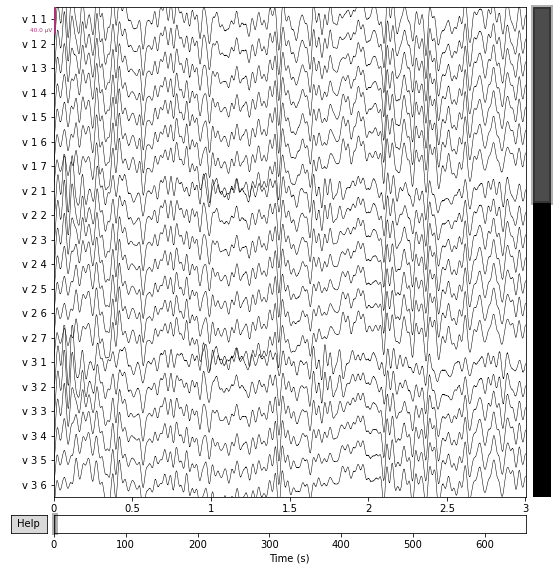

Effective window size : 2.036 (s)


<ipython-input-19-c0f172a379d3>:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  labeled_data.plot_psd()


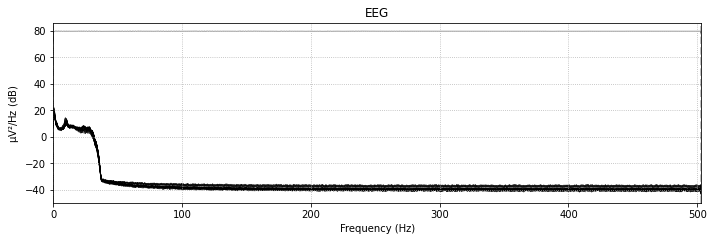

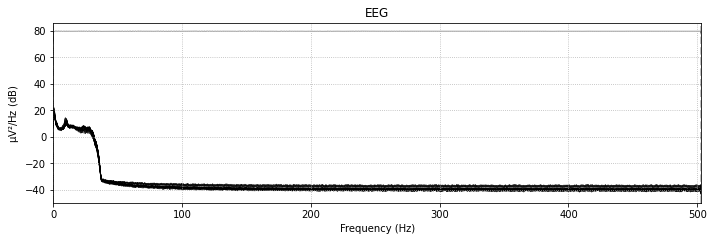

In [19]:
events = mne.find_events(data, stim_channel='METKA')

labeled_data.set_montage('standard_1020', on_missing='warn')
labeled_data.load_data()
labeled_data.plot(duration=3)
labeled_data.plot_psd()

## Indices

In [20]:
def select(values, indices):
  if values[0] == values[1] + 10:
    return set(indices)
  else:
    return {}

In [21]:
# METKA channel
label_channel = raw_data[-1]

ind = np.arange(label_channel.shape[0])
ind = ind[label_channel > 0]

indices = set()

for i in range(ind.shape[0] - 1):
  indices = indices.union(select(label_channel[ind[i : i + 2]], ind[i : i + 2]))

indices = np.array(sorted(list(indices)))

label_channel[indices][:500]

array([14.,  4., 14.,  4., 14.,  4., 12.,  2., 17.,  7., 13.,  3., 17.,
        7., 12.,  2., 15.,  5., 12.,  2., 15.,  5., 11.,  1., 15.,  5.,
       16.,  6., 15.,  5., 15.,  5., 17.,  7., 16.,  6., 14.,  4., 15.,
        5., 11.,  1., 12.,  2., 17.,  7., 12.,  2., 14.,  4., 15.,  5.,
       13.,  3., 13.,  3., 13.,  3., 16.,  6., 15.,  5., 17.,  7., 16.,
        6., 13.,  3., 15.,  5., 17.,  7., 14.,  4., 11.,  1., 17.,  7.,
       11.,  1., 17.,  7., 11.,  1., 17.,  7., 14.,  4., 14.,  4., 16.,
        6., 15.,  5., 16.,  6., 13.,  3., 13.,  3., 17.,  7., 15.,  5.,
       12.,  2., 17.,  7., 13.,  3., 15.,  5., 17.,  7., 16.,  6., 12.,
        2., 14.,  4., 16.,  6., 13.,  3., 14.,  4., 13.,  3., 16.,  6.,
       17.,  7., 12.,  2., 11.,  1., 16.,  6., 11.,  1., 14.,  4., 12.,
        2., 16.,  6., 13.,  3., 12.,  2., 17.,  7., 11.,  1., 14.,  4.,
       12.,  2., 13.,  3., 16.,  6., 13.,  3., 13.,  3., 17.,  7., 11.,
        1., 17.,  7., 11.,  1., 17.,  7., 11.,  1., 16.,  6., 13

In [37]:
indices_listen = indices[::2]
indices_repeat = indices[1::2]
label_channel[indices_listen][:500], label_channel[indices_repeat][:500]

(array([14., 14., 14., 12., 17., 13., 17., 12., 15., 12., 15., 11., 15.,
        16., 15., 15., 17., 16., 14., 15., 11., 12., 17., 12., 14., 15.,
        13., 13., 13., 16., 15., 17., 16., 13., 15., 17., 14., 11., 17.,
        11., 17., 11., 17., 14., 14., 16., 15., 16., 13., 13., 17., 15.,
        12., 17., 13., 15., 17., 16., 12., 14., 16., 13., 14., 13., 16.,
        17., 12., 11., 16., 11., 14., 12., 16., 13., 12., 17., 11., 14.,
        12., 13., 16., 13., 13., 17., 11., 17., 11., 17., 11., 16., 13.,
        12., 12., 11., 13., 13., 16., 11., 12., 13., 11., 15., 15., 14.,
        12., 11., 12., 17., 16., 16., 15., 13., 14., 12., 17., 13.]),
 array([4., 4., 4., 2., 7., 3., 7., 2., 5., 2., 5., 1., 5., 6., 5., 5., 7.,
        6., 4., 5., 1., 2., 7., 2., 4., 5., 3., 3., 3., 6., 5., 7., 6., 3.,
        5., 7., 4., 1., 7., 1., 7., 1., 7., 4., 4., 6., 5., 6., 3., 3., 7.,
        5., 2., 7., 3., 5., 7., 6., 2., 4., 6., 3., 4., 3., 6., 7., 2., 1.,
        6., 1., 4., 2., 6., 3., 2., 7., 1.

In [38]:
LABELS = label_channel[indices_repeat]

LABELS.shape

(116,)

In [39]:
# shift for 100ms (100 samples), extend for DURATIONms (302 samples)

# indices = indices + 100
DURATION = 300

indices_listen = np.array(sorted(list(set(indices_listen).union(*[set(indices_listen + j) for j in range(1, DURATION)]))))
indices_repeat = np.array(sorted(list(set(indices_repeat).union(*[set(indices_repeat + j) for j in range(1, DURATION)]))))
indices_noise = np.concatenate((np.arange(1000, 1300),
                                indices_repeat[:-300] + 10000),
                               dtype=int)
print(f'There are labels <= {np.max(label_channel[indices_noise])} indices_noise')
indices_listen.shape, indices_repeat.shape, indices_noise.shape

There are labels <= 0.0 indices_noise


((34800,), (34800,), (34800,))

In [42]:
electrodes = raw_data[:-1]
sig_listen = np.empty((0, indices_listen.shape[0]))
sig_repeat = np.empty((0, indices_repeat.shape[0]))
sig_noise = np.empty((0, indices_noise.shape[0]))

# so straight because of insufficient RAM problem...
for i in range(49):
  sig_listen = np.append(sig_listen, electrodes[i][indices_listen].reshape(1, -1), axis=0)
  sig_repeat = np.append(sig_repeat, electrodes[i][indices_repeat].reshape(1, -1), axis=0)
  sig_noise = np.append(sig_noise, electrodes[i][indices_noise].reshape(1, -1), axis=0)

sig_listen = sig_listen.T.reshape(LABELS.shape[0], DURATION, 49)
sig_repeat = sig_repeat.T.reshape(LABELS.shape[0], DURATION, 49)
sig_noise = sig_noise.T.reshape(LABELS.shape[0], DURATION, 49)

sig_listen.shape, sig_repeat.shape, sig_noise.shape 

((116, 300, 49), (116, 300, 49), (116, 300, 49))

In [43]:
LABELS.shape

(116,)

In [44]:
import h5py

with h5py.File('/content/drive/MyDrive/EEG_data/listen_repeat_noise.h5', 'w') as hdf:
  hdf.create_dataset('listen', data=sig_listen)
  hdf.create_dataset('repeat', data=sig_repeat)
  hdf.create_dataset('noise', data=sig_noise)
  hdf.create_dataset('labels', data=LABELS)

### Loading data from other patients (in order to mix data)

In [ ]:
import h5py

with h5py.File('/content/drive/MyDrive/EEG_data/meaned_over_ocur_bash_phon.h5', 'r') as hdf:
  sig_bash = hdf['train_set_x'][:]
  sig_bash_test = hdf['test_set_x'][:]
  LABELS_bash = hdf['train_set_y'][:]
  LABELS_bash_test = hdf['test_set_y'][:]

sig_bash.shape, LABELS_bash.shape, sig_bash_test.shape, LABELS_bash_test.shape

((104, 300, 49), (104,), (12, 300, 49), (12,))

In [ ]:
# concatenating bond & bash

sig_con = np.concatenate((sig, sig_bash, sig_bash_test), axis=0)
LABELS_con = np.concatenate((LABELS, LABELS_bash, LABELS_bash_test), axis=0)

sig_con.shape, LABELS_con.shape

((240, 300, 49), (240,))

### Splitting into train / test 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    sig_con, LABELS_con,
    test_size=0.1,
    random_state=32,
    shuffle = True
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 300, 49), (24, 300, 49), (216,), (24,))

### Taking mean over all occurrences of each label

In [ ]:
meaned_sigs = np.empty((0, 300, 49))

for label in np.unique(y_train):
  label_sigs = X_train[y_train == label]
  label_sigs = np.expand_dims(np.mean(label_sigs, axis=0), axis=0)
  meaned_sigs = np.append(meaned_sigs, label_sigs, axis=0)

meaned_sigs.shape

(7, 300, 49)

### Plotting electrode signals inside of one group

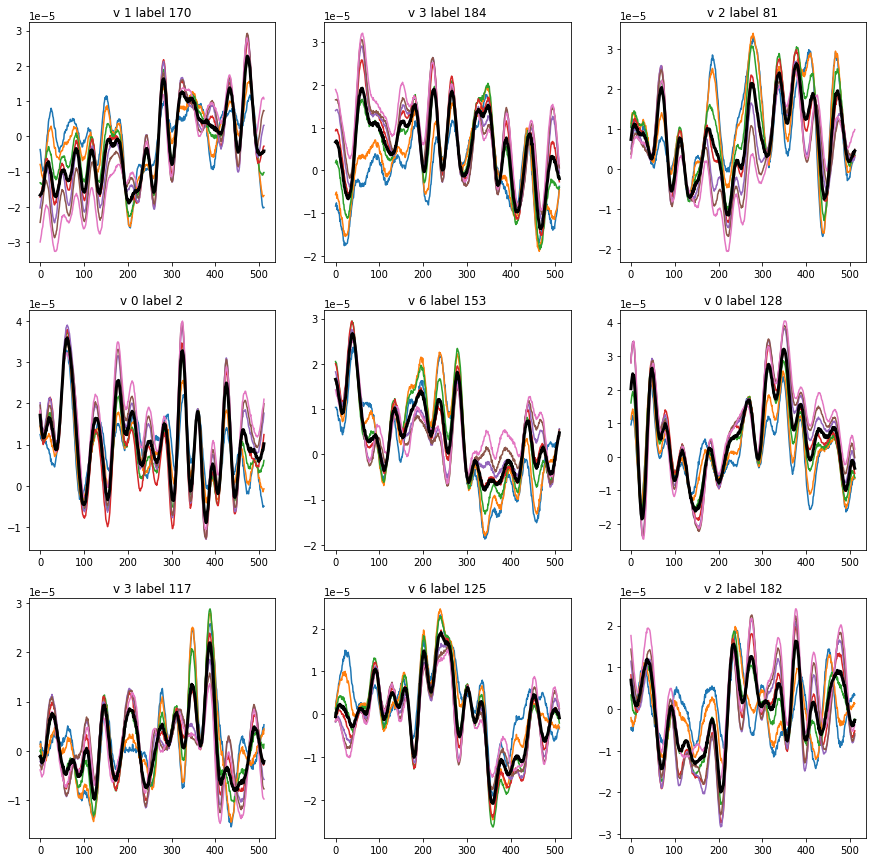

In [ ]:
fig, axes = plt.subplots(figsize=(15, 15), nrows=3, ncols=3) # figure 
events = np.random.randint(0, high=LABELS.shape[0], size=9, dtype=int) # random labels
els = np.random.randint(0, high=7, size=9, dtype=int) # random electrode groups

for i in range(9):
  mean = np.zeros(DURATION)

  for j in np.arange(els[i] * 7, (els[i]+1) * 7, dtype=int):
    signal = sig[events[i], :, j]
    signal = np.squeeze(signal)
    mean += signal
    axes[i // 3][i % 3].plot(signal)

  axes[i // 3][i % 3].plot(mean / 7, c='black', linewidth=3)
  axes[i // 3][i % 3].set_title(f'v {els[i]} label {events[i]}')

## Taking mean signal 

In [ ]:
mean_sig = np.empty((LABELS.shape[0], DURATION, 0))

for i in range(7):
  mean_sig = np.append(
      mean_sig, 
      np.mean(sig[:, :, i * 7: (i + 1) * 7], axis=-1, keepdims=True),
      axis=-1
  )
mean_sig.shape

(244, 512, 7)

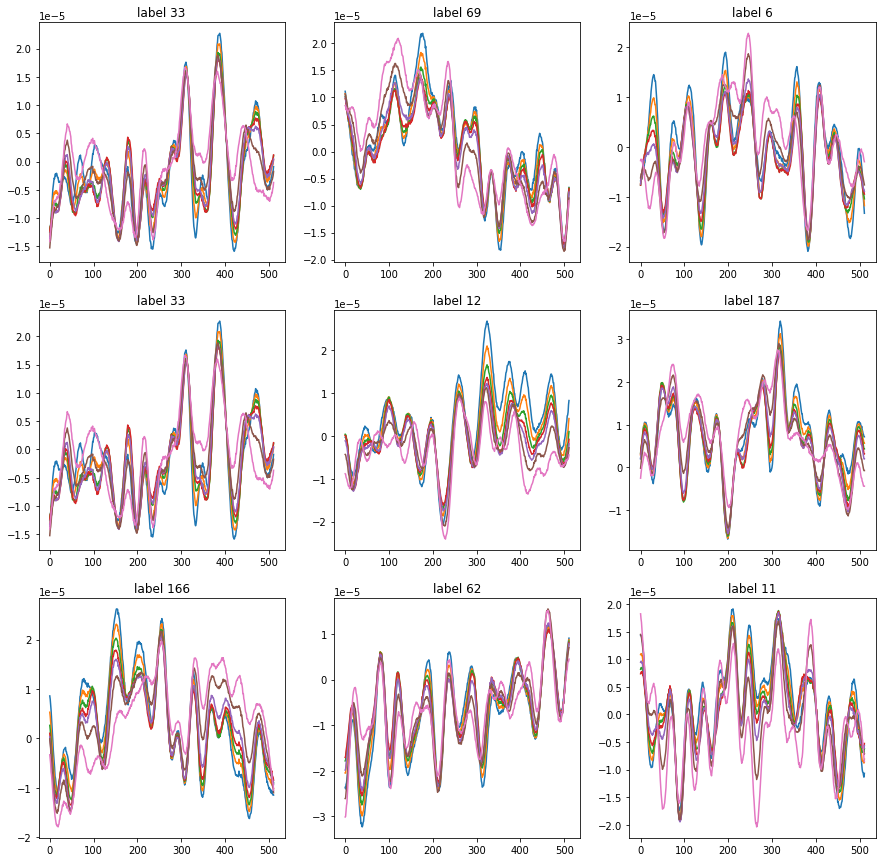

In [ ]:
fig, axes = plt.subplots(figsize=(15, 15), nrows=3, ncols=3) # figure 
events = np.random.randint(0, high=LABELS.shape[0], size=9, dtype=int) # random labels

for i in range(9):
  # mean = np.zeros(302)

  for j in range(7):
    signal = mean_sig[events[i], :, j]
    signal = np.squeeze(signal)
    # mean += signal
    axes[i // 3][i % 3].plot(signal)

  # axes[i // 3][i % 3].plot(mean / 7, c='black', linewidth=3)
  axes[i // 3][i % 3].set_title(f'label {events[i]}')

## Computing spectrums 

In [ ]:
SR = 1006
FRAME_SIZE = 64
HOP_LENGTH = 16

In [ ]:
spectrums = np.empty((0, 33, 29))

for evnt in range(LABELS.shape[0]):
  for elec in range(7):
    sgnl = mean_sig[evnt, :, elec]
    x = np.abs(librosa.stft(sgnl, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False))
    spectrums = np.append(spectrums, np.expand_dims(x, axis=0), axis=0)

spectrums.shape

/usr/local/lib/python3.7/dist-packages/librosa/util/utils.py:200: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  "on a non-contiguous input. This will result in a copy.".format(axis)


(1708, 33, 29)

In [ ]:
# labels 

LABELS = np.repeat(LABELS, 7) - 1
LABELS.shape

(1708,)

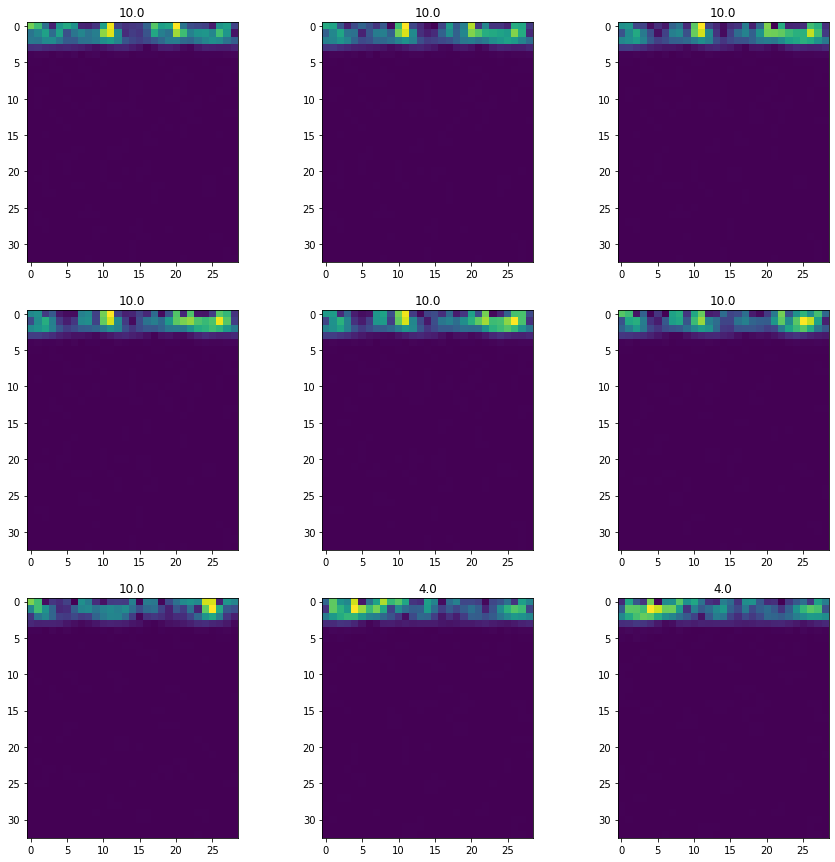

In [ ]:
fig, axes = plt.subplots(figsize=(15, 15), nrows=3, ncols=3)

for i in range(3):

  for j in range(3):

    axes[i][j].imshow(spectrums[i*3 + j])
    axes[i][j].set_title(LABELS[i*3 + j])

In [ ]:
def plot_spectrogram(S, sr, hop_length, y_axis='linear'):
    plt.figure(figsize=(25, 10))
    S = librosa.power_to_db(S)
    librosa.display.specshow(S, sr=sr, hop_length=hop_length, x_axis='time', y_axis=y_axis)
    plt.colorbar()

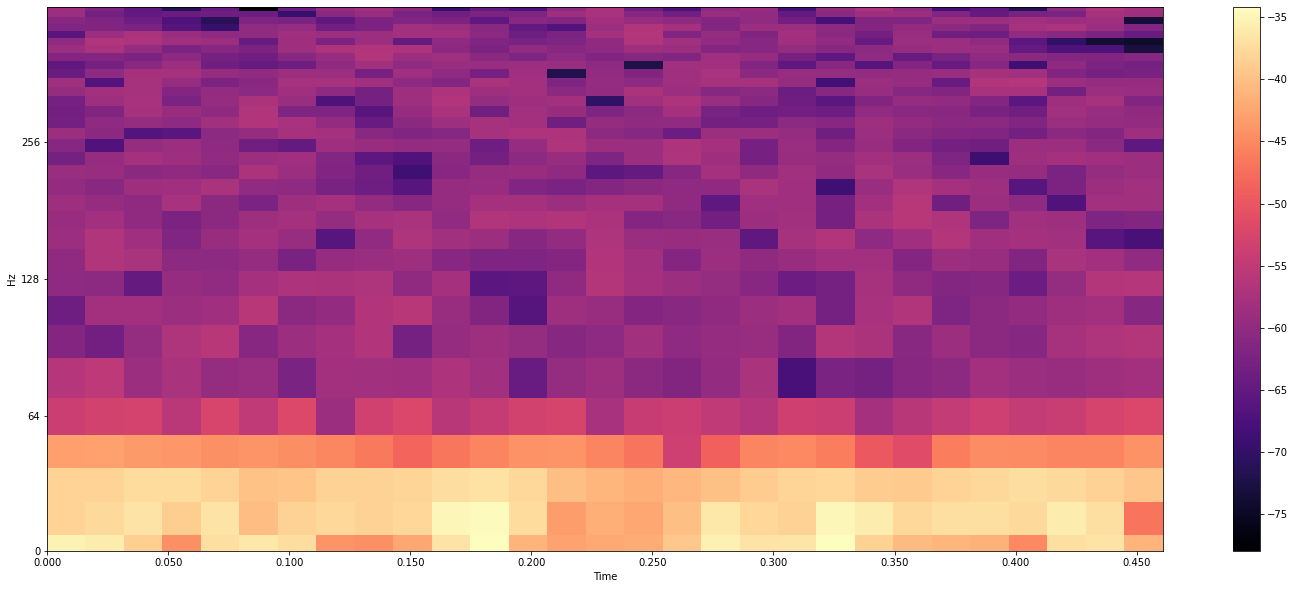

In [ ]:
plot_spectrogram(spectrums[0], sr=1006.4, hop_length=HOP_LENGTH, y_axis='log')

In [ ]:
np.max(spectrums)

0.0016204342189286734

In [ ]:
spectrums.shape

(1708, 33, 29)

## Saving 

In [ ]:
sig.shape, LABELS.shape

((116, 300, 49), (116,))

#### As .csv

In [ ]:
mean_sig = mean_sig.reshape(mean_sig.shape[0], mean_sig.shape[1] * mean_sig.shape[2])
np.savetxt("/content/drive/MyDrive/EEG_data/bond_slogi.csv", mean_sig, delimiter=",")

In [ ]:
np.savetxt("/content/drive/MyDrive/EEG_data/bond_slogi_labels.csv", LABELS, delimiter=",")

#### As .h5

In [ ]:
# saving 

import h5py

with h5py.File('/content/drive/MyDrive/EEG_data/TMP_BASH.h5', 'w') as hdf:
  hdf.create_dataset('train_set_x', data=sig)
  hdf.create_dataset('train_set_y', data=LABELS)

## Concatenating datasets

In [ ]:
bash = np.loadtxt('/content/drive/MyDrive/EEG_data/bash_slogi.csv', delimiter=',', ndmin=2)
bash_labels = np.loadtxt('/content/drive/MyDrive/EEG_data/bash_slogi_labels.csv', delimiter=',', ndmin=2)

bond = np.loadtxt('/content/drive/MyDrive/EEG_data/bond_slogi.csv', delimiter=',', ndmin=2)
bond_labels = np.loadtxt('/content/drive/MyDrive/EEG_data/bond_slogi_labels.csv', delimiter=',', ndmin=2)

In [ ]:
A = np.concatenate((bash, bond), axis=0).reshape(-1, 302, 7)
labels = np.squeeze(np.concatenate((bash_labels, bond_labels), axis=0))

A.shape, labels.shape

((360, 302, 7), (360,))

In [ ]:
# splitting 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    np.expand_dims(spectrums, axis=-1), LABELS,
    test_size=0.2,
    random_state=32,
    shuffle = True
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1366, 33, 29, 1), (342, 33, 29, 1), (1366,), (342,))

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((104, 300, 49), (12, 300, 49), (104,), (12,))

In [ ]:
# saving 

import h5py

with h5py.File('/content/drive/MyDrive/EEG_data/meaned_over_ocur_mixed_phon.h5', 'w') as hdf:
  hdf.create_dataset('meaned', data=meaned_sigs)
  hdf.create_dataset('train_set_x', data=X_train)
  hdf.create_dataset('train_set_y', data=y_train)
  hdf.create_dataset('test_set_x', data=X_test)
  hdf.create_dataset('test_set_y', data=y_test)

#with h5py.File('/content/drive/MyDrive/EEG_data/meaned_over_ocur_bas_phon_test.h5', 'w') as hdf:
#  hdf.create_dataset('test_set_x', data=X_test)
#  hdf.create_dataset('test_set_y', data=y_test)

In [ ]:
['meaned',
'train_set_x',
'train_set_y',
'test_set_x',
'test_set_y']

7el_spectrums_test.h5	B_dev.csv    meaned_over_ocur_bash_phon.h5   runs2
7el_spectrums_train.h5	B_train.csv  meaned_over_ocur_mixed_phon.h5
A_dev.csv		ch_names.h5  relabeled_unpacked
A_train.csv		logs	     runs


#### Some plotting 

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3321 samples (3.301 sec)

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



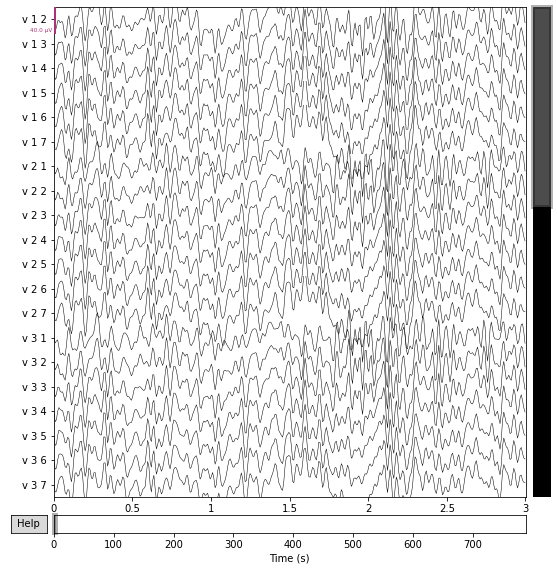

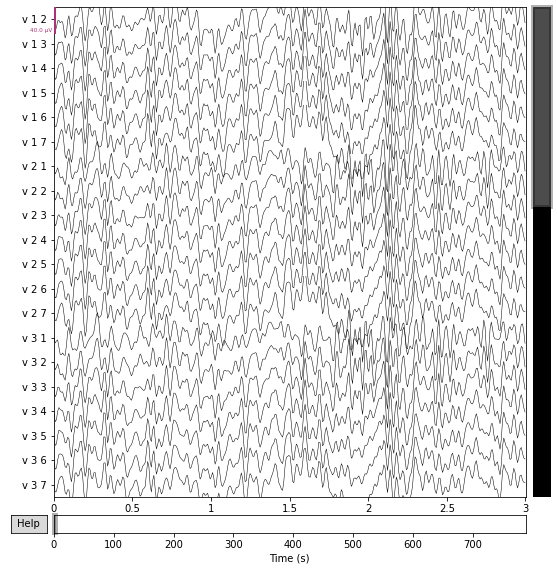

In [ ]:
labeled_data = labeled_data.filter(1, 40)
labeled_data.plot(duration=3)

In [ ]:
e = mne.Epochs(labeled_data, events)

Not setting metadata
434 matching events found
Setting baseline interval to [-0.1997932487773846, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [ ]:
evented_data = e.get_data()
print(f'evented_data.shape {evented_data.shape}')
print(f'events.shape {events.shape}')

Using data from preloaded Raw for 434 events and 705 original time points ...
0 bad epochs dropped
evented_data.shape (434, 49, 705)
events.shape (434, 3)


## Exploring signals

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



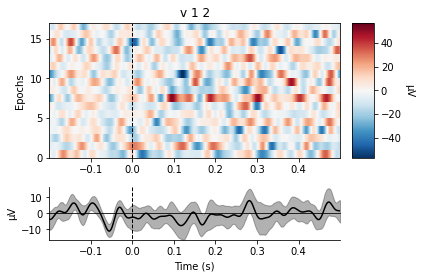

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



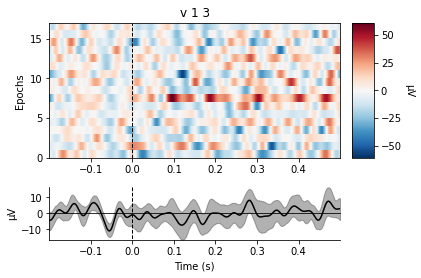

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



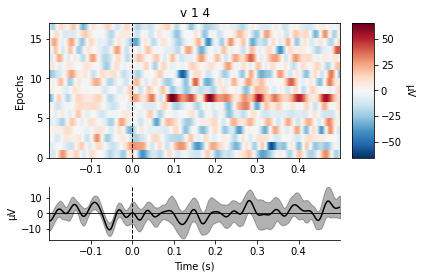

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



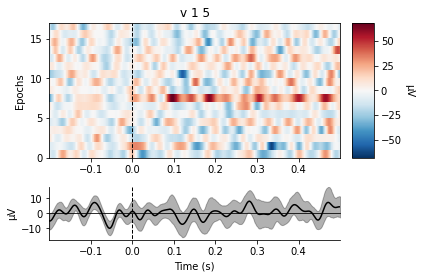

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



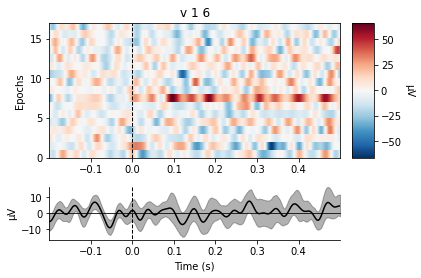

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



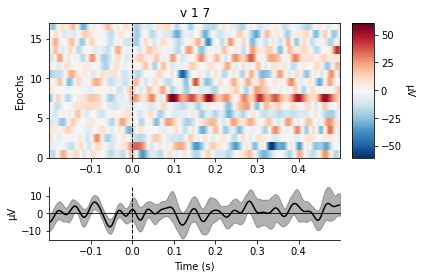

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



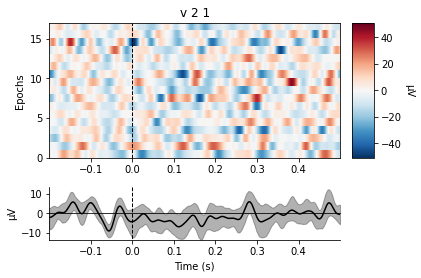

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



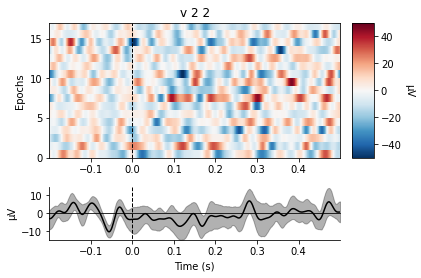

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



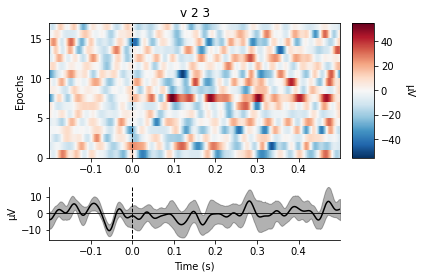

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



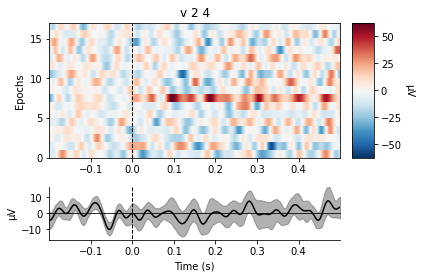

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



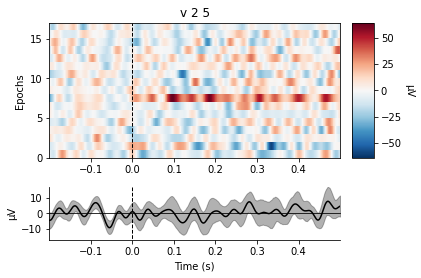

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



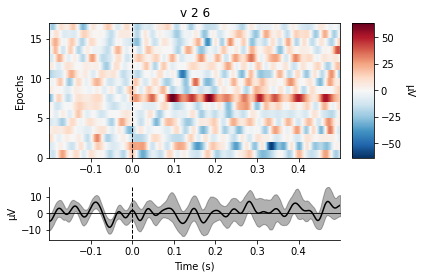

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



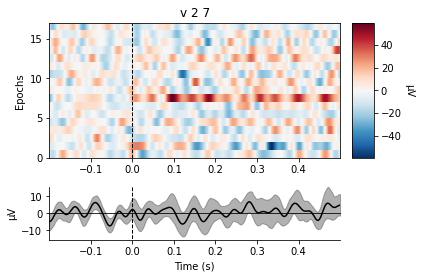

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



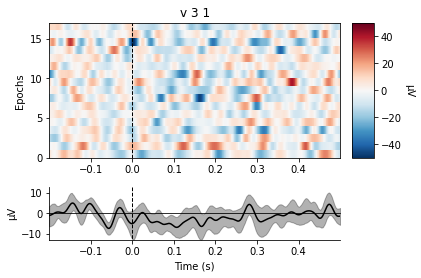

Using data from preloaded Raw for 17 events and 705 original time points ...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-35-7db238356401>:2: RuntimeWarning:

Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.



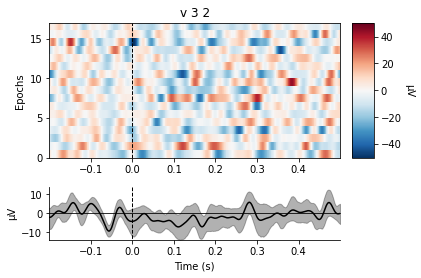

In [ ]:
for i in range(15):
    mne.viz.plot_epochs_image(e['7'], picks=[i]) # label 15 with all channels 